<a href="https://colab.research.google.com/github/dheanrp/soft_computing/blob/main/tugas2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Soft Computing

## Tugas 2: Convolutional Neural Networks

### Mekanisme

Anda hanya diwajibkan untuk mengumpulkan file ini saja ke uploader yang disediakan di http://elearning2.uai.ac.id/. Ganti nama file ini saat pengumpulan menjadi tugas2_NIM.ipynb.

**Keterlambatan**: Pengumpulan tugas yang melebihi tenggat yang telah ditentukan tidak akan diterima. Keterlambatan akan berakibat pada nilai nol untuk tugas ini.

**Kolaborasi**: Anda diperbolehkan untuk berdiskusi dengan teman Anda, tetapi dilarang keras menyalin kode maupun tulisan dari teman Anda.

### Petunjuk

_Packages_ yang Anda akan gunakan dalam mengerjakan tugas ini antara lain:

- tensorflow/keras
- matplotlib
- numpy
- pandas
- pillow
- scipy
- seaborn

Anda diperbolehkan (jika dirasa perlu) untuk mengimpor modul tambahan untuk tugas ini. Namun, seharusnya modul yang tersedia sudah cukup untuk memenuhi kebutuhan Anda. Untuk kode yang Anda ambil dari sumber lain, **cantumkan URL menuju referensi tersebut jika diambil dari internet**!

Perhatikan poin untuk tiap soal! **Semakin kecil poinnya, berarti kode yang diperlukan untuk menjawab soal tersebut seharusnya semakin sedikit!**

**Nilai akhir: XX/50**

### Deskripsi Dataset

Dalam tugas ini, Anda akan mencoba melakukan klasifikasi objek melalui gambar dengan dataset [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html). Data ini terdiri dari 60000 gambar berwarna dengan ukuran 32x32 pixels yang terbagi ke dalam 10 kelas. Data ini dikumpulkan oleh Alex Krizhevsky, Vinod Nair, dan Geoffrey Hinton. Tugas Anda adalah menghasilkan model yang dapat mengklasifikasikan sebaik mungkin masing-masing objek dalam dataset tersebut.

### Mengimpor Modul dan Dataset

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

%matplotlib inline

In [3]:
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 3s 0us/step


In [4]:
labels = [
    'airplane',
    'automobile',
    'bird',
    'cat',
    'deer',
    'dog',
    'frog',
    'horse',
    'ship',
    'truck'
]

## 1. Eksplorasi Awal Data dan Preprocessing (10 poin)

Pada bagian ini, kecuali dijelaskan lebih rinci, dataset yang Anda harusnya gunakan adalah `x_train`.

### Soal 1.1 (2 poin)

Tunjukkan dimensi dari data latih dan data uji.

In [5]:
x_train.shape, x_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

### Soal 1.2 (3 poin)

Ambil 1 contoh gambar dari masing-masing kelas, lalu gambarkan.

*Petunjuk: Anda dapat menggunakan `plt.imshow()`*

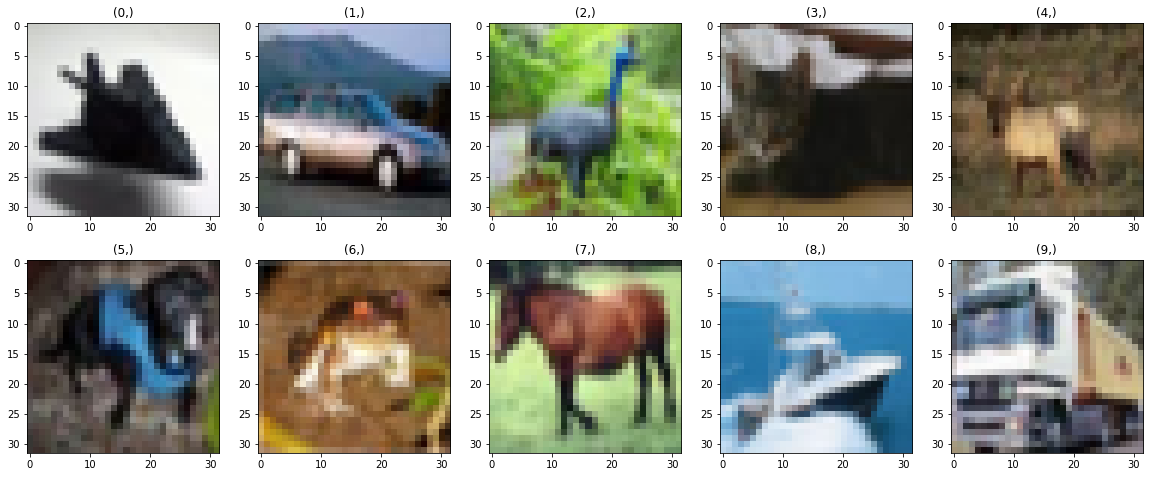

In [6]:
f, axes = plt.subplots(2, 5, figsize=(20,8))
axes = axes.reshape(-1)
for i in zip (range(10)):
    a = axes[i]
    idx = np.where(y_train == i)
    a.imshow(x_train[idx[0][0]])
    a.set_title(i)
plt.show()

### Soal 1.3 (5 poin)

Anda akan melakukan dua jenis pemrosesan, untuk hitam-putih dan untuk gambar berwarna. Saat ini, Anda hanya memiliki gambar berwarna. Oleh karena itu, ubah gambar dalam data latih dan data uji menjadi hitam-putih. Caranya adalah dengan mencari nilai rata-rata dari ketiga channel RGB untuk setiap pixel. Tunjukkan 5 sampel gambar untuk memastikan bahwa warnanya sudah berubah.

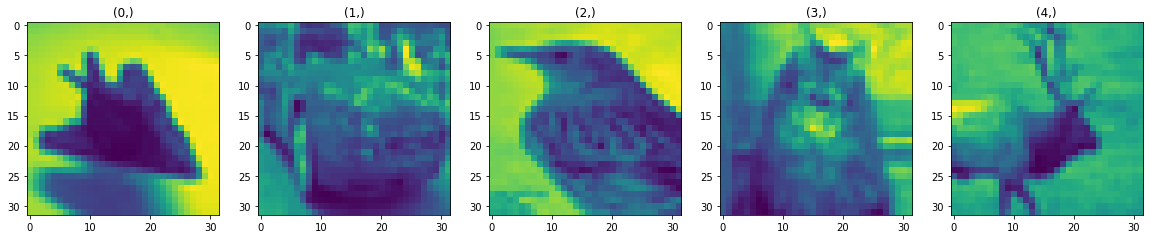

In [7]:
f, axes = plt.subplots(1, 5, figsize=(20,8))
axes = axes.reshape(-1)
x_train_ = np.average(x_train, axis=-1)
for i in zip (range(5)):
    a = axes[i]
    idx = np.where(y_train == i)
    a.imshow(x_train_[idx[0][i]])
    a.set_title(i)
plt.show()

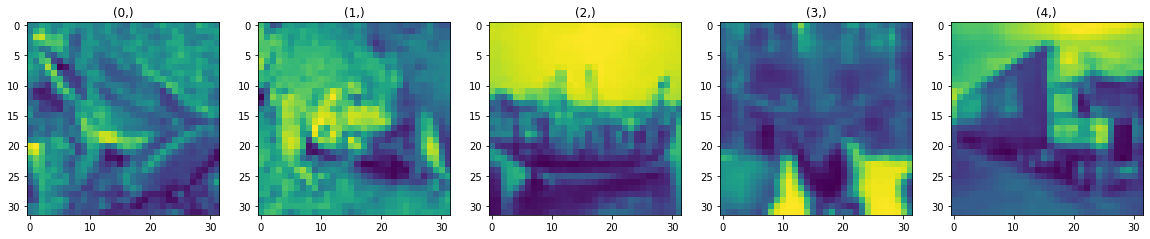

In [8]:
f, axes = plt.subplots(1, 5, figsize=(20,8))
axes = axes.reshape(-1)
x_test_ = np.average(x_test, axis=-1)
for i in zip (range(5)):
    a = axes[i]
    idx = np.where(y_train == i)
    a.imshow(x_test_[idx[0][i]])
    a.set_title(i)
plt.show()

## 2. Klasifikasi dengan Multilayer Perceptron (20 poin)

*Petunjuk: Karena melatih dalam 50 epochs dapat memakan waktu. Anda dapat menyelesaikan bagian 2 dan 3 dari tugas ini dengan menggunakan 10 epochs terlebih dahulu. Jika semua kode sudah bekerja dengan baik, Anda dapat menambahkan jumlah epochs menjadi 50 kemudian.*

### Soal 2.1 (2 poin)

Buatlah model Multilayer Perceptron (MLP) dengan input berupa gambar dalam hitam-putih. Gunakan satu hidden layer dengan 1200 ReLU hidden units.

In [9]:
def mlp():
  model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(100, activation=tf.nn.relu),
        tf.keras.layers.Dense(1200, activation=tf.nn.relu),
        tf.keras.layers.Dense(10, activation=tf.nn.softmax)
   ])
  return model

### Soal 2.2.a (3 poin)

Latih model yang telah Anda buat dengan *training set*. Gunakan Adam sebagai optimizer dari model Anda, `categorical_crossentropy` atau `sparse_categorical_entropy` sebagai *loss function*, 50 epochs, `validation_split` 0.2, dan akurasi sebagai *metric*. Berapa persen akurasi pada data latih dan data validasi dari model yang dihasilkan?

*Catatan: Anda mungkin saja perlu mengubah nilai gambar menjadi [0,1]. Selain itu, perlu ada perubahan dari dimensi y_train dan y_test.*

In [10]:
from keras.utils import np_utils

y_train_ = np_utils.to_categorical(y_train, 10)
y_test_ = np_utils.to_categorical(y_test, 10)
x_train_ = x_train.astype('float32').reshape(50000, 3072)
x_test_ = x_test.astype('float32').reshape(10000, 3072)
x_train_  /= 255.0
x_test_ /= 255.0
x_train_.shape, x_test_.shape

((50000, 3072), (10000, 3072))

source: https://ermlab.com/en/blog/nlp/cifar-10-classification-using-keras-tutorial/

In [11]:
np.random.seed(42)

model = mlp()
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train_, y_train_, validation_split=0.2, epochs=50)

Epoch 1/50
1250/1250 [==============================] - 9s 7ms/step - loss: 1.9807 - accuracy: 0.2681 - val_loss: 1.7493 - val_accuracy: 0.3730
Epoch 2/50
1250/1250 [==============================] - 8s 7ms/step - loss: 1.7401 - accuracy: 0.3717 - val_loss: 1.7084 - val_accuracy: 0.3937
Epoch 3/50
1250/1250 [==============================] - 8s 6ms/step - loss: 1.6833 - accuracy: 0.3938 - val_loss: 1.6855 - val_accuracy: 0.3973
Epoch 4/50
1250/1250 [==============================] - 8s 6ms/step - loss: 1.6300 - accuracy: 0.4147 - val_loss: 1.6560 - val_accuracy: 0.4051
Epoch 5/50
1250/1250 [==============================] - 8s 6ms/step - loss: 1.6063 - accuracy: 0.4244 - val_loss: 1.6742 - val_accuracy: 0.4122
Epoch 6/50
1250/1250 [==============================] - 8s 6ms/step - loss: 1.5744 - accuracy: 0.4326 - val_loss: 1.6138 - val_accuracy: 0.4230
Epoch 7/50
1250/1250 [==============================] - 8s 6ms/step - loss: 1.5650 - accuracy: 0.4379 - val_loss: 1.6122 - val_accuracy:

### Soal 2.2.b (2 poin)

Gambarkan *learning curve* berupa akurasi dari data latih dan data validasi dari proses pelatihan di atas.

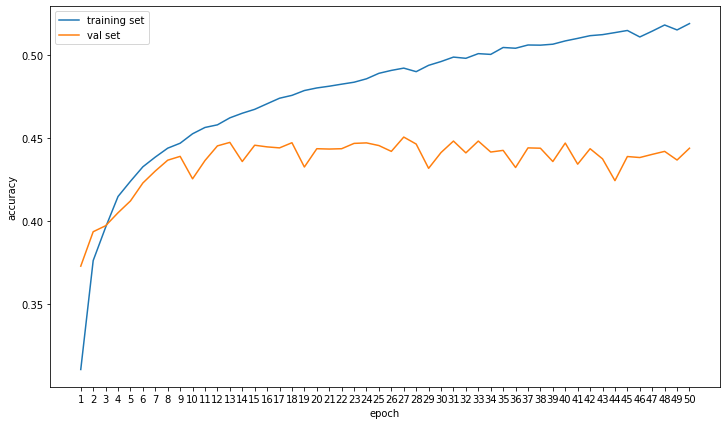

In [12]:
fig, ax = plt.subplots(figsize=(12,7))
plt.plot(range(1,51), history.history['accuracy'], label='training set')
plt.plot(range(1,51), history.history['val_accuracy'], label='val set')
plt.xticks(range(1,51), range(1,51))
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend();

### Soal 2.3 (3 poin)

Evaluasi model Anda pada data uji. Berapa akurasi yang didapatkan? Gambarkan pula *confusion matrix* dari prediksi yang Anda hasilkan terhadap nilai yang sebenarnya.

In [13]:
pred = model.predict(x_test_)
pred_ = np.argmax(pred, axis=1)

In [14]:
y_test_ = np.argmax(y_test_, axis=1)

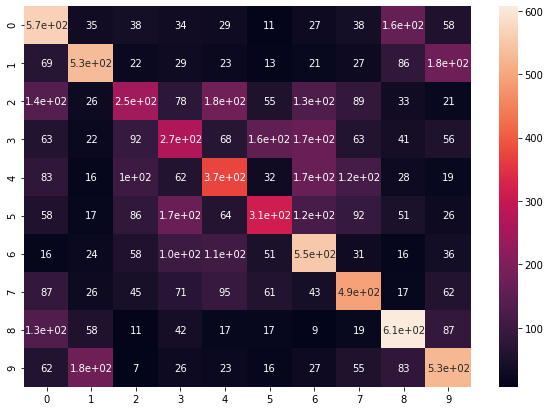

In [15]:
from sklearn.metrics import confusion_matrix

f, ax = plt.subplots(figsize=(10,7))
cm = confusion_matrix(y_test_, pred_)
sns.heatmap(cm, annot=True)

### Soal 2.4 (5 poin)

Coba untuk melakukan klasifikasi dengan MLP, tetapi dengan gambar yang berwarna. Anda dibebaskan untuk menentukan arsitektur neural network yang akan digunakan. Berapa akurasi pada data uji yang bisa Anda dapatkan?

In [16]:
np.random.seed(42)

def mlpc():
  model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(100, activation=tf.nn.relu),
        tf.keras.layers.Dense(20, activation=tf.nn.relu),
        tf.keras.layers.Dense(450, activation=tf.nn.relu),
        tf.keras.layers.Dense(600, activation=tf.nn.relu),
        tf.keras.layers.Dense(400, activation=tf.nn.relu),
        tf.keras.layers.Dense(20, activation=tf.nn.relu),
        tf.keras.layers.Dense(10, activation=tf.nn.softmax)
   ])
  return model

model = mlpc()
model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train_, y_train_, validation_split=0.3, epochs=5)

Epoch 1/5
1094/1094 [==============================] - 12s 11ms/step - loss: 2.2367 - accuracy: 0.1606 - val_loss: 1.9599 - val_accuracy: 0.2765
Epoch 2/5
1094/1094 [==============================] - 11s 11ms/step - loss: 1.9436 - accuracy: 0.2796 - val_loss: 1.8897 - val_accuracy: 0.3080
Epoch 3/5
1094/1094 [==============================] - 11s 10ms/step - loss: 1.8216 - accuracy: 0.3363 - val_loss: 1.7479 - val_accuracy: 0.3663
Epoch 4/5
1094/1094 [==============================] - 12s 11ms/step - loss: 1.7448 - accuracy: 0.3652 - val_loss: 1.6923 - val_accuracy: 0.3897
Epoch 5/5
1094/1094 [==============================] - 12s 11ms/step - loss: 1.6861 - accuracy: 0.3936 - val_loss: 1.8497 - val_accuracy: 0.3493


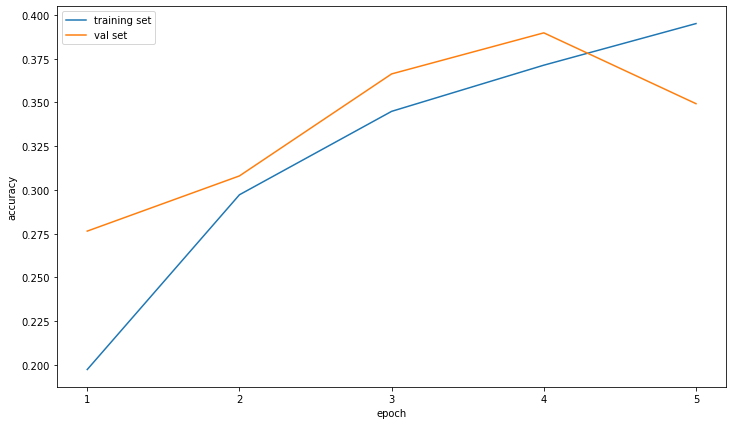

In [17]:
fig, ax = plt.subplots(figsize=(12,7))
plt.plot(range(1,6), history.history['accuracy'], label='training set')
plt.plot(range(1,6), history.history['val_accuracy'], label='val set')
plt.xticks(range(1,6), range(1,6))
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend();

In [18]:
pred = model.predict(x_test_)
pred_ = np.argmax(pred, axis=1)

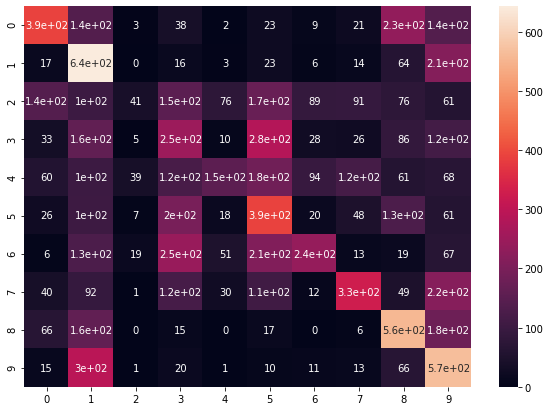

In [19]:
f, ax = plt.subplots(figsize=(10,7))
cm = confusion_matrix(y_test_, pred_)
sns.heatmap(cm, annot=True)

### Soal 2.5 (5 poin)

Apa kesimpulan yang dapat Anda ambil sejauh ini? *Petunjuk: Anda dapat membandingkan akurasi terbaik yang Anda dapatkan dengan akurasi yang mungkin didapatkan jika klasifikasinya hanya berupa model yang menebak objek secara acak (uniform random).*

**Jawab:**

Model yang hanya menggunakan MLP tidak dapat mempelajari pola yang ada di data latih karena hanya berupa objek yang menebak secara acak hal ini berpengaruh terhadap proses validasinya, sehingga tidak dapat menggunakan kembali informasi dari data trainingnya.

## 3. Convolutional Neural Networks (20 poin)

Apakah kita bisa menghasilkan model klasifikasi yang lebih baik?

### Soal 3.1 (5 poin)

Buatlah model *convolutional neural network* untuk melakukan klasifikasi. Anda dibebaskan untuk menentukan arsitekturnya.

In [20]:
def cnn():
  model =  tf.keras.models.Sequential([
          tf.keras.layers.Conv2D(128, kernel_size=2, activation='relu', input_shape=(32,32, 3)),
          tf.keras.layers.Conv2D(64, kernel_size=2, activation='relu'),
          tf.keras.layers.Conv2D(128, kernel_size=2, activation='relu'),
          tf.keras.layers.Conv2D(64, kernel_size=2, activation='relu'),
          tf.keras.layers.Conv2D(32, kernel_size=2, activation='relu'),
          tf.keras.layers.Flatten(),
          tf.keras.layers.Dense(10, activation='softmax')
    ])
  return model

### Soal 3.2 (3 poin)

Latih model dengan data latih dan gunakan 20% dari data latih sebagai validasi. Gambarkan *learning curve* dari model Anda.

Epoch 1/10
1250/1250 [==============================] - 598s 478ms/step - loss: 2.4707 - accuracy: 0.2961 - val_loss: 1.4497 - val_accuracy: 0.5161
Epoch 2/10
1250/1250 [==============================] - 601s 481ms/step - loss: 1.1822 - accuracy: 0.5917 - val_loss: 1.2071 - val_accuracy: 0.5851
Epoch 3/10
1250/1250 [==============================] - 603s 482ms/step - loss: 0.9193 - accuracy: 0.6818 - val_loss: 1.0953 - val_accuracy: 0.6209
Epoch 4/10
1250/1250 [==============================] - 608s 486ms/step - loss: 0.7017 - accuracy: 0.7581 - val_loss: 1.2032 - val_accuracy: 0.5959
Epoch 5/10
1250/1250 [==============================] - 613s 490ms/step - loss: 0.5161 - accuracy: 0.8210 - val_loss: 1.3679 - val_accuracy: 0.5908
Epoch 6/10
1250/1250 [==============================] - 610s 488ms/step - loss: 0.3678 - accuracy: 0.8707 - val_loss: 1.7087 - val_accuracy: 0.5645
Epoch 7/10
1250/1250 [==============================] - 611s 489ms/step - loss: 0.2769 - accuracy: 0.9042 - val_

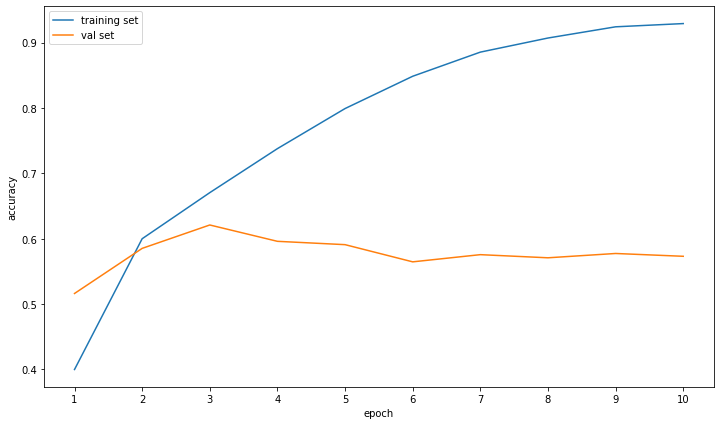

In [21]:
np.random.seed(42)

model = cnn()
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train, y_train_, validation_split=0.2, epochs=10)

fig, ax = plt.subplots(figsize=(12,7))
plt.plot(range(1,11), history.history['accuracy'], label='training set')
plt.plot(range(1,11), history.history['val_accuracy'], label='val set')
plt.xticks(range(1,11), range(1,11))
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend();

### Soal 3.3 (5 poin)

Salah satu cara untuk menghasilkan klasifikasi yang lebih baik pada dataset berupa gambar adalah dengan melakukan augmentasi. Definisikan augmentasinya dengan `keras.preprocessing.image.ImageDataGenerator`, lalu latih ulang model Anda. Pastikan bahwa data validasi tidak diaugmentasi. Berapa akurasi yang Anda dapatkan sekarang?

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = train_test_split(x_train, y_train_, test_size=0.2)

datagen = tf.keras.preprocessing.image.ImageDataGenerator(horizontal_flip=True,
                                                          rotation_range= 90.0)

In [23]:
datagen.fit(X_train)

In [24]:
np.random.seed(42)

model = cnn()
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit_generator(datagen.flow(X_train, Y_train), epochs=10, validation_data=(X_val, Y_val))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
1250/1250 [==============================] - 630s 504ms/step - loss: 2.5846 - accuracy: 0.1215 - val_loss: 2.2162 - val_accuracy: 0.1910
Epoch 2/10
1250/1250 [==============================] - 627s 501ms/step - loss: 2.0811 - accuracy: 0.2399 - val_loss: 1.7733 - val_accuracy: 0.3545
Epoch 3/10
1250/1250 [==============================] - 625s 500ms/step - loss: 1.7943 - accuracy: 0.3526 - val_loss: 1.6931 - val_accuracy: 0.4001
Epoch 4/10
1250/1250 [==============================] - 624s 499ms/step - loss: 1.6147 - accuracy: 0.4210 - val_loss: 1.6756 - val_accuracy: 0.4289
Epoch 5/10
1250/1250 [==============================] - 623s 498ms/step - loss: 1.5270 - accuracy: 0.4553 - val_loss: 1.4902 - val_accuracy: 0.4756
Epoch 6/10
1250/1250 [==============================] - 625s 500ms/step - loss: 1.4595 - accuracy: 0.4803 - val_loss: 1.4687 - val_accuracy: 0.4909
Epoch 7/10
1250/1250 [==============================] - 624s 499ms/step - loss: 1.4178 - accuracy: 0.5003 - val_

### Soal 3.4 (2 poin)

Lakukan klasifikasi pada data uji dengan model terbaik yang Anda hasilkan. Berapa akurasi yang Anda dapatkan? Gambarkan pula *confusion matrix*-nya!

Epoch 1/10
1250/1250 [==============================] - 607s 485ms/step - loss: 2.4183 - accuracy: 0.2854 - val_loss: 1.4542 - val_accuracy: 0.4806
Epoch 2/10
1250/1250 [==============================] - 604s 483ms/step - loss: 1.2028 - accuracy: 0.5880 - val_loss: 1.2164 - val_accuracy: 0.5697
Epoch 3/10
1250/1250 [==============================] - 606s 485ms/step - loss: 0.9068 - accuracy: 0.6824 - val_loss: 1.1698 - val_accuracy: 0.5936
Epoch 4/10
1250/1250 [==============================] - 606s 484ms/step - loss: 0.6978 - accuracy: 0.7573 - val_loss: 1.2364 - val_accuracy: 0.5974
Epoch 5/10
1250/1250 [==============================] - 608s 486ms/step - loss: 0.4997 - accuracy: 0.8244 - val_loss: 1.3795 - val_accuracy: 0.5934
Epoch 6/10
1250/1250 [==============================] - 610s 488ms/step - loss: 0.3731 - accuracy: 0.8696 - val_loss: 1.5784 - val_accuracy: 0.5864
Epoch 7/10
1250/1250 [==============================] - 609s 487ms/step - loss: 0.2823 - accuracy: 0.9001 - val_

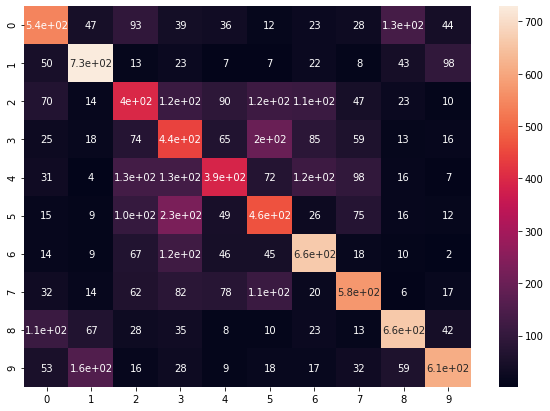

In [25]:
model = cnn()
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train, y_train_, validation_split=0.2, epochs=10)

pred = model.predict(x_test)
pred_ = np.argmax(pred, axis=1)

f, ax = plt.subplots(figsize=(10,7))
cm = confusion_matrix(y_test_, pred_)
sns.heatmap(cm, annot=True)

In [26]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test_, pred_)

0.5482

### Soal 3.5 (5 poin)

Berikan kesimpulan Anda dari eksplorasi yang telah Anda lakukan pada tugas ini.

**Jawaban:**

Untuk melakukan klasifikasi gambar menggunakan CNN sangat membantu karena model yang di buat dapat mempelajari fitur dari setiap gambar dan setiap kelas